In [1]:
image_dir = r"C:\Users\Leo's PC\Desktop\images"
csv_dir = r"C:\Users\Leo's PC\Desktop\AVA.txt"
pickle_dir = r"D:\Pickle"

In [2]:
import pickle
import os
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import threading
from threading import Thread
import time

This code should complete the following:
    - Create a dictionary with {image_name, avg-rating} that only contains the images that exists in the folder.
    - Create 5 dictionaris that contain images with rating (1,2), (3,4), (5), (6, 7), (8, 9).
    - Make sure that each dictionary has 30,000 images. Priority shall be given to images with the following tags:
    - Delete extra items from the dictionaries.
    - Overwrite the ratings with (0, 0.25, 0.50, 0.75, 1).
    - Combine 5 dictionaries into one, which contains 150,000 images.
    - Save the dictionary to a pickle jar.
    

In [6]:
csv = pd.read_csv(csv_dir, sep=' ')

for _, _, files in os.walk(image_dir):
    img_name_array = files
    
idx = 0
for index, row in csv.iterrows():
    image_name = row[1]
    if (str(image_name) + '.jpg') in img_name_array:
        rating_array = np.array(row[2:12])
        
        index = 0
        Sum = 0
        num_count = 0
        for count in rating_array:
            Sum += count * (index + 1)
            index +=1
            num_count += count
        avg_rat = (Sum/num_count).real.astype(int)
        
        diction_25k[idx] = [image_name, avg_rat]
        idx += 1
        if idx % 1000 == 0:
            print('idx', idx, 'img_name', image_name, 'avg_rat', avg_rat)


idx 1000 img_name 308823 avg_rat 5
idx 2000 img_name 295697 avg_rat 5
idx 3000 img_name 633608 avg_rat 5
idx 4000 img_name 712792 avg_rat 5
idx 5000 img_name 313127 avg_rat 5
idx 6000 img_name 163128 avg_rat 5
idx 7000 img_name 262613 avg_rat 6
idx 8000 img_name 303240 avg_rat 5
idx 9000 img_name 615846 avg_rat 5
idx 10000 img_name 757771 avg_rat 4
idx 11000 img_name 135736 avg_rat 3
idx 12000 img_name 903446 avg_rat 6
idx 13000 img_name 39148 avg_rat 5
idx 14000 img_name 103980 avg_rat 5
idx 15000 img_name 537773 avg_rat 5
idx 16000 img_name 868967 avg_rat 5
idx 17000 img_name 183195 avg_rat 5
idx 18000 img_name 156038 avg_rat 5
idx 19000 img_name 281926 avg_rat 5
idx 20000 img_name 448260 avg_rat 6
idx 21000 img_name 755900 avg_rat 5
idx 22000 img_name 934962 avg_rat 5
idx 23000 img_name 188460 avg_rat 6
idx 24000 img_name 861321 avg_rat 5
idx 25000 img_name 873812 avg_rat 5
idx 26000 img_name 903519 avg_rat 5
idx 27000 img_name 120725 avg_rat 5
idx 28000 img_name 288835 avg_rat 4
id

idx 227000 img_name 780065 avg_rat 4
idx 228000 img_name 13522 avg_rat 5
idx 229000 img_name 32266 avg_rat 4
idx 230000 img_name 813375 avg_rat 6
idx 231000 img_name 936799 avg_rat 4
idx 232000 img_name 829603 avg_rat 5
idx 233000 img_name 15691 avg_rat 3
idx 234000 img_name 265846 avg_rat 5
idx 235000 img_name 106502 avg_rat 6
idx 236000 img_name 2874 avg_rat 5
idx 237000 img_name 101704 avg_rat 5
idx 238000 img_name 176325 avg_rat 5
idx 239000 img_name 504342 avg_rat 6
idx 240000 img_name 842793 avg_rat 5
idx 241000 img_name 1604 avg_rat 5
idx 242000 img_name 694425 avg_rat 4
idx 243000 img_name 921462 avg_rat 4
idx 244000 img_name 664780 avg_rat 6
idx 245000 img_name 588763 avg_rat 6
idx 246000 img_name 246410 avg_rat 4
idx 247000 img_name 931535 avg_rat 6
idx 248000 img_name 72322 avg_rat 5
idx 249000 img_name 285070 avg_rat 4
idx 250000 img_name 325102 avg_rat 5
idx 251000 img_name 409796 avg_rat 5
idx 252000 img_name 12644 avg_rat 5
idx 253000 img_name 126874 avg_rat 5
idx 254000

In [3]:
diction_25k = {}
diction_15k = {}

In [36]:
dic_1 = {}
dic_2 = {}
dic_3 = {}
dic_4 = {}
dic_5 = {}

In [5]:
#helper function： take a list of tags, return all the photos with given tags
result = []

def tagFetcher(taglist, files, num=0):
    
    imglist = []
    img_name_array = files
    
    for index, row in csv.iterrows():
        image_name = row[1]
        if (str(image_name) + '.jpg') in img_name_array:
            tags = np.array(row[13:15])
            if tags[0] != 0 and tags[0] in taglist:
                imglist.append(image_name)
            elif tags[1] != 0 and tags[0] in taglist:
                imglist.append(image_name)
        if len(imglist) == num and num != 0:
            break
                
    random.shuffle(imglist)
    
    return imglist

def split(arr, count):
     return [arr[i::count] for i in range(count)]

In [ ]:
class MyThread(Thread):

    def __init__(self, taglist, files, num=0):
        Thread.__init__(self)
        self.taglist = taglist
        self.files = files
        self.num = num

    def run(self):
        self.result = tagFetcher(self.taglist, self.files, self.num)

    def get_result(self):
        return result

In [ ]:
num_threads = 8
taglist = [9, 13, 18, 23, 24, 25, 29, 30, 42, 44, 45, 47]

csv = pd.read_csv(csv_dir, sep=' ')
for _, _, files in os.walk(image_dir):
    img_name_array = files

# img_name_array = split(img_name_array, num_threads)

thread = []
result = []

for i in range(num_threads):
    t = MyThread(taglist, img_name_array[i], 0)
    thread.append(t)
    t.start()

print(threading.active_count(), 'threads active')
    
for t in thread:
    t.join()
    result = result + t.get_result()

print(len(result))

In [8]:
taglist = [4, 9, 13, 14, 16, 18, 19, 23, 24, 25, 29, 30, 31, 39, 40, 42, 44, 45, 47, 50, 51]
result = tagFetcher(taglist, img_name_array, num=0)

In [37]:
groupsize = 20000

index1 = 0
index2 = 0
index3 = 0
index4 = 0
index5 = 0

indexsum = 0

for idx, data in diction_25k.items():
    img_name = data[0]
    rating = data[1]
    if (rating == 1 or rating == 2 or rating == 3) and (index1 < groupsize):
        dic_1.update({index1 : [img_name, 0]})
        index1 += 1
        indexsum += 1
    elif rating == 4 and index2 < groupsize:
        if img_name in result:
            dic_2.update({index2 : [img_name, 1]})
            index2 += 1
            indexsum += 1
    elif rating == 5 and index3 < groupsize:
        if img_name in result:
            dic_3.update({index3 : [img_name, 2]})
            index3 += 1
            indexsum += 1
    elif rating == 6 and index4 < groupsize:
        if img_name in result:
            dic_4.update({index4 : [img_name, 3]})
            index4 += 1
            indexsum += 1
    elif (rating == 7 or rating == 8 or rating == 9) and (index5 < groupsize):
        dic_5.update({index5 : [img_name, 4]})
        index5 += 1
        indexsum += 1

In [38]:
print(dic_2)

{0: [953750, 1], 1: [953019, 1], 2: [953245, 1], 3: [953715, 1], 4: [770642, 1], 5: [771443, 1], 6: [771404, 1], 7: [769959, 1], 8: [769730, 1], 9: [769801, 1], 10: [771508, 1], 11: [930324, 1], 12: [930632, 1], 13: [929914, 1], 14: [929981, 1], 15: [930630, 1], 16: [445201, 1], 17: [445046, 1], 18: [445312, 1], 19: [443543, 1], 20: [149078, 1], 21: [149561, 1], 22: [149249, 1], 23: [149199, 1], 24: [148701, 1], 25: [149130, 1], 26: [149353, 1], 27: [149462, 1], 28: [149432, 1], 29: [148869, 1], 30: [149466, 1], 31: [149342, 1], 32: [148031, 1], 33: [148024, 1], 34: [148685, 1], 35: [149086, 1], 36: [149246, 1], 37: [147815, 1], 38: [149245, 1], 39: [149507, 1], 40: [775050, 1], 41: [775665, 1], 42: [774062, 1], 43: [775583, 1], 44: [775691, 1], 45: [774453, 1], 46: [775510, 1], 47: [775430, 1], 48: [775591, 1], 49: [689627, 1], 50: [688999, 1], 51: [689748, 1], 52: [689446, 1], 53: [688969, 1], 54: [688039, 1], 55: [688947, 1], 56: [308869, 1], 57: [307203, 1], 58: [307357, 1], 59: [3

In [41]:
var = pickle.dump(diction_15k, open(pickle_dir, 'wb'))
for i in range(5): 
    dic = var.get('dic_' + str(i+1))
    keylist = [*dic]
    while len(dic) < groupsize:
        dic.update({len(dic) + 1 : dic[keylist[random.randint(0, (len(keylist) - 1))]]})
        print((len(dic) + 1), dic[keylist[random.randint(0, (len(keylist) - 1))]])

3305 [9019, 4]
3306 [898400, 4]
3307 [4296, 4]
3308 [445797, 4]
3309 [64180, 4]
3310 [478202, 4]
3311 [735752, 4]
3312 [656029, 4]
3313 [252167, 4]
3314 [52353, 4]
3315 [16176, 4]
3316 [911491, 4]
3317 [96580, 4]
3318 [583086, 4]
3319 [602868, 4]
3320 [580338, 4]
3321 [580805, 4]
3322 [707303, 4]
3323 [411332, 4]
3324 [741083, 4]
3325 [7625, 4]
3326 [187039, 4]
3327 [10653, 4]
3328 [765644, 4]
3329 [327615, 4]
3330 [316307, 4]
3331 [108583, 4]
3332 [722920, 4]
3333 [70626, 4]
3334 [10188, 4]
3335 [653829, 4]
3336 [449866, 4]
3337 [335351, 4]
3338 [394099, 4]
3339 [183085, 4]
3340 [273193, 4]
3341 [531892, 4]
3342 [786610, 4]
3343 [845, 4]
3344 [221223, 4]
3345 [111473, 4]
3346 [433213, 4]
3347 [202789, 4]
3348 [362367, 4]
3349 [386913, 4]
3350 [28283, 4]
3351 [126240, 4]
3352 [310290, 4]
3353 [900679, 4]
3354 [626142, 4]
3355 [268200, 4]
3356 [324139, 4]
3357 [754498, 4]
3358 [692445, 4]
3359 [720255, 4]
3360 [886626, 4]
3361 [625979, 4]
3362 [619785, 4]
3363 [911952, 4]
3364 [54458, 4

4685 [426503, 4]
4686 [257959, 4]
4687 [109615, 4]
4688 [651711, 4]
4689 [722488, 4]
4690 [429262, 4]
4691 [422364, 4]
4692 [334545, 4]
4693 [475295, 4]
4694 [254955, 4]
4695 [10838, 4]
4696 [93749, 4]
4697 [661184, 4]
4698 [359270, 4]
4699 [96505, 4]
4700 [251838, 4]
4701 [433896, 4]
4702 [609022, 4]
4703 [716338, 4]
4704 [379186, 4]
4705 [820191, 4]
4706 [521444, 4]
4707 [920996, 4]
4708 [42873, 4]
4709 [423294, 4]
4710 [946879, 4]
4711 [386831, 4]
4712 [580965, 4]
4713 [271248, 4]
4714 [825723, 4]
4715 [54032, 4]
4716 [853992, 4]
4717 [606486, 4]
4718 [953492, 4]
4719 [60587, 4]
4720 [692795, 4]
4721 [812577, 4]
4722 [460386, 4]
4723 [60491, 4]
4724 [426788, 4]
4725 [441231, 4]
4726 [271076, 4]
4727 [872548, 4]
4728 [517499, 4]
4729 [284603, 4]
4730 [281626, 4]
4731 [765622, 4]
4732 [7685, 4]
4733 [563300, 4]
4734 [677533, 4]
4735 [35763, 4]
4736 [145395, 4]
4737 [656862, 4]
4738 [926725, 4]
4739 [946872, 4]
4740 [885718, 4]
4741 [741560, 4]
4742 [616334, 4]
4743 [777131, 4]
4744 [6

6157 [1855, 4]
6158 [85623, 4]
6159 [372686, 4]
6160 [2856, 4]
6161 [678485, 4]
6162 [628845, 4]
6163 [861043, 4]
6164 [362294, 4]
6165 [11363, 4]
6166 [40960, 4]
6167 [109315, 4]
6168 [862, 4]
6169 [428974, 4]
6170 [748403, 4]
6171 [31842, 4]
6172 [103484, 4]
6173 [635159, 4]
6174 [178131, 4]
6175 [454854, 4]
6176 [585409, 4]
6177 [765622, 4]
6178 [511442, 4]
6179 [743542, 4]
6180 [129362, 4]
6181 [426963, 4]
6182 [168960, 4]
6183 [657713, 4]
6184 [488457, 4]
6185 [44981, 4]
6186 [121324, 4]
6187 [2155, 4]
6188 [368012, 4]
6189 [5516, 4]
6190 [32311, 4]
6191 [512353, 4]
6192 [202789, 4]
6193 [636450, 4]
6194 [491067, 4]
6195 [639441, 4]
6196 [813299, 4]
6197 [102518, 4]
6198 [770189, 4]
6199 [696440, 4]
6200 [683341, 4]
6201 [836758, 4]
6202 [828895, 4]
6203 [664705, 4]
6204 [21089, 4]
6205 [436414, 4]
6206 [916077, 4]
6207 [824234, 4]
6208 [441655, 4]
6209 [262628, 4]
6210 [771822, 4]
6211 [41218, 4]
6212 [461298, 4]
6213 [241890, 4]
6214 [426503, 4]
6215 [339633, 4]
6216 [541023, 4]

7657 [16732, 4]
7658 [150, 4]
7659 [379186, 4]
7660 [375580, 4]
7661 [402861, 4]
7662 [953097, 4]
7663 [846715, 4]
7664 [101520, 4]
7665 [647210, 4]
7666 [428359, 4]
7667 [893221, 4]
7668 [832667, 4]
7669 [775082, 4]
7670 [359270, 4]
7671 [625835, 4]
7672 [597974, 4]
7673 [410907, 4]
7674 [18435, 4]
7675 [25881, 4]
7676 [807875, 4]
7677 [940811, 4]
7678 [835137, 4]
7679 [25881, 4]
7680 [75533, 4]
7681 [181175, 4]
7682 [814959, 4]
7683 [845, 4]
7684 [949628, 4]
7685 [149974, 4]
7686 [507407, 4]
7687 [728168, 4]
7688 [98528, 4]
7689 [162990, 4]
7690 [440037, 4]
7691 [631358, 4]
7692 [424903, 4]
7693 [246709, 4]
7694 [689637, 4]
7695 [950528, 4]
7696 [771399, 4]
7697 [790419, 4]
7698 [202870, 4]
7699 [309632, 4]
7700 [502462, 4]
7701 [551179, 4]
7702 [578638, 4]
7703 [484695, 4]
7704 [11651, 4]
7705 [721842, 4]
7706 [916772, 4]
7707 [395777, 4]
7708 [634194, 4]
7709 [757676, 4]
7710 [204559, 4]
7711 [429045, 4]
7712 [696572, 4]
7713 [680499, 4]
7714 [754881, 4]
7715 [86099, 4]
7716 [19064

9157 [898145, 4]
9158 [339030, 4]
9159 [556763, 4]
9160 [4621, 4]
9161 [526962, 4]
9162 [128244, 4]
9163 [429186, 4]
9164 [952960, 4]
9165 [754498, 4]
9166 [99252, 4]
9167 [917080, 4]
9168 [165010, 4]
9169 [792266, 4]
9170 [570051, 4]
9171 [314785, 4]
9172 [17921, 4]
9173 [360281, 4]
9174 [178033, 4]
9175 [942969, 4]
9176 [70566, 4]
9177 [70626, 4]
9178 [862004, 4]
9179 [523519, 4]
9180 [413029, 4]
9181 [767811, 4]
9182 [115152, 4]
9183 [938183, 4]
9184 [449866, 4]
9185 [521444, 4]
9186 [539142, 4]
9187 [649922, 4]
9188 [837328, 4]
9189 [12176, 4]
9190 [721817, 4]
9191 [223462, 4]
9192 [638393, 4]
9193 [949475, 4]
9194 [754881, 4]
9195 [109315, 4]
9196 [420456, 4]
9197 [56702, 4]
9198 [173472, 4]
9199 [127346, 4]
9200 [765243, 4]
9201 [894361, 4]
9202 [868020, 4]
9203 [679104, 4]
9204 [18526, 4]
9205 [153329, 4]
9206 [598086, 4]
9207 [572936, 4]
9208 [836427, 4]
9209 [262628, 4]
9210 [685065, 4]
9211 [439853, 4]
9212 [31144, 4]
9213 [694343, 4]
9214 [697300, 4]
9215 [608557, 4]
9216 [3

10681 [442842, 4]
10682 [157741, 4]
10683 [660129, 4]
10684 [492106, 4]
10685 [746252, 4]
10686 [147178, 4]
10687 [11653, 4]
10688 [6358, 4]
10689 [354676, 4]
10690 [874774, 4]
10691 [829060, 4]
10692 [450814, 4]
10693 [437572, 4]
10694 [556763, 4]
10695 [81723, 4]
10696 [1509, 4]
10697 [120752, 4]
10698 [700132, 4]
10699 [801160, 4]
10700 [915650, 4]
10701 [303998, 4]
10702 [618212, 4]
10703 [608557, 4]
10704 [17305, 4]
10705 [899172, 4]
10706 [375809, 4]
10707 [456194, 4]
10708 [490024, 4]
10709 [829525, 4]
10710 [625835, 4]
10711 [509286, 4]
10712 [267110, 4]
10713 [18921, 4]
10714 [686325, 4]
10715 [272399, 4]
10716 [759, 4]
10717 [289221, 4]
10718 [2856, 4]
10719 [10106, 4]
10720 [683341, 4]
10721 [504863, 4]
10722 [165064, 4]
10723 [369803, 4]
10724 [382950, 4]
10725 [17742, 4]
10726 [130995, 4]
10727 [731878, 4]
10728 [287123, 4]
10729 [251931, 4]
10730 [802358, 4]
10731 [634462, 4]
10732 [14608, 4]
10733 [399876, 4]
10734 [168621, 4]
10735 [519849, 4]
10736 [357186, 4]
10737 [5

12228 [755681, 4]
12229 [327412, 4]
12230 [281265, 4]
12231 [333037, 4]
12232 [438474, 4]
12233 [726858, 4]
12234 [814959, 4]
12235 [726858, 4]
12236 [894696, 4]
12237 [683985, 4]
12238 [626226, 4]
12239 [387907, 4]
12240 [13536, 4]
12241 [214450, 4]
12242 [41346, 4]
12243 [9520, 4]
12244 [560326, 4]
12245 [699582, 4]
12246 [949143, 4]
12247 [310290, 4]
12248 [904061, 4]
12249 [86457, 4]
12250 [314393, 4]
12251 [274652, 4]
12252 [813299, 4]
12253 [504288, 4]
12254 [895403, 4]
12255 [626541, 4]
12256 [185753, 4]
12257 [507911, 4]
12258 [921347, 4]
12259 [327998, 4]
12260 [752048, 4]
12261 [22876, 4]
12262 [550484, 4]
12263 [310071, 4]
12264 [399768, 4]
12265 [754570, 4]
12266 [457313, 4]
12267 [807945, 4]
12268 [751170, 4]
12269 [593479, 4]
12270 [595948, 4]
12271 [887683, 4]
12272 [663927, 4]
12273 [521321, 4]
12274 [426788, 4]
12275 [692473, 4]
12276 [177263, 4]
12277 [86409, 4]
12278 [626541, 4]
12279 [309632, 4]
12280 [1930, 4]
12281 [566418, 4]
12282 [765091, 4]
12283 [243153, 4]
1

13809 [131762, 4]
13810 [312075, 4]
13811 [765724, 4]
13812 [914321, 4]
13813 [149553, 4]
13814 [785457, 4]
13815 [298624, 4]
13816 [65834, 4]
13817 [445420, 4]
13818 [453148, 4]
13819 [220146, 4]
13820 [365525, 4]
13821 [425931, 4]
13822 [543759, 4]
13823 [35018, 4]
13824 [29019, 4]
13825 [676706, 4]
13826 [7410, 4]
13827 [169355, 4]
13828 [660013, 4]
13829 [16630, 4]
13830 [75854, 4]
13831 [491471, 4]
13832 [115482, 4]
13833 [318661, 4]
13834 [818020, 4]
13835 [103105, 4]
13836 [150384, 4]
13837 [136288, 4]
13838 [163677, 4]
13839 [359270, 4]
13840 [717565, 4]
13841 [944804, 4]
13842 [619713, 4]
13843 [368012, 4]
13844 [408257, 4]
13845 [822814, 4]
13846 [874759, 4]
13847 [956052, 4]
13848 [503876, 4]
13849 [651131, 4]
13850 [862046, 4]
13851 [870347, 4]
13852 [420407, 4]
13853 [862334, 4]
13854 [9729, 4]
13855 [96991, 4]
13856 [426084, 4]
13857 [439227, 4]
13858 [941565, 4]
13859 [55807, 4]
13860 [180602, 4]
13861 [864968, 4]
13862 [485624, 4]
13863 [749423, 4]
13864 [292151, 4]
138

15406 [560288, 4]
15407 [743617, 4]
15408 [949628, 4]
15409 [6015, 4]
15410 [759, 4]
15411 [10653, 4]
15412 [459547, 4]
15413 [876454, 4]
15414 [617324, 4]
15415 [741212, 4]
15416 [747951, 4]
15417 [471066, 4]
15418 [779596, 4]
15419 [51039, 4]
15420 [341762, 4]
15421 [177263, 4]
15422 [927209, 4]
15423 [426315, 4]
15424 [517499, 4]
15425 [801855, 4]
15426 [435443, 4]
15427 [93053, 4]
15428 [405867, 4]
15429 [59722, 4]
15430 [851295, 4]
15431 [829060, 4]
15432 [200213, 4]
15433 [614661, 4]
15434 [319894, 4]
15435 [503752, 4]
15436 [340186, 4]
15437 [350466, 4]
15438 [676429, 4]
15439 [274652, 4]
15440 [52544, 4]
15441 [848340, 4]
15442 [816810, 4]
15443 [703069, 4]
15444 [24639, 4]
15445 [44981, 4]
15446 [491203, 4]
15447 [288830, 4]
15448 [55757, 4]
15449 [98016, 4]
15450 [5400, 4]
15451 [889037, 4]
15452 [372686, 4]
15453 [578722, 4]
15454 [314758, 4]
15455 [41981, 4]
15456 [687745, 4]
15457 [541800, 4]
15458 [66917, 4]
15459 [118150, 4]
15460 [893996, 4]
15461 [103255, 4]
15462 [906

16905 [467042, 4]
16906 [245901, 4]
16907 [741376, 4]
16908 [848148, 4]
16909 [555837, 4]
16910 [476965, 4]
16911 [54744, 4]
16912 [376656, 4]
16913 [323773, 4]
16914 [387612, 4]
16915 [252167, 4]
16916 [460279, 4]
16917 [685248, 4]
16918 [621106, 4]
16919 [107609, 4]
16920 [426303, 4]
16921 [579716, 4]
16922 [777758, 4]
16923 [900740, 4]
16924 [83733, 4]
16925 [612232, 4]
16926 [451028, 4]
16927 [764364, 4]
16928 [696572, 4]
16929 [20439, 4]
16930 [52541, 4]
16931 [524857, 4]
16932 [327412, 4]
16933 [78785, 4]
16934 [164856, 4]
16935 [35763, 4]
16936 [685472, 4]
16937 [7625, 4]
16938 [521, 4]
16939 [771399, 4]
16940 [940723, 4]
16941 [331899, 4]
16942 [298535, 4]
16943 [333373, 4]
16944 [931389, 4]
16945 [19764, 4]
16946 [780373, 4]
16947 [3272, 4]
16948 [738603, 4]
16949 [12176, 4]
16950 [740999, 4]
16951 [801160, 4]
16952 [681967, 4]
16953 [807651, 4]
16954 [21115, 4]
16955 [16176, 4]
16956 [16572, 4]
16957 [674225, 4]
16958 [60588, 4]
16959 [149616, 4]
16960 [383046, 4]
16961 [2234

18468 [621051, 4]
18469 [955268, 4]
18470 [485112, 4]
18471 [824827, 4]
18472 [11054, 4]
18473 [20411, 4]
18474 [910405, 4]
18475 [317797, 4]
18476 [13903, 4]
18477 [663927, 4]
18478 [64362, 4]
18479 [602778, 4]
18480 [386913, 4]
18481 [28248, 4]
18482 [708895, 4]
18483 [485229, 4]
18484 [488, 4]
18485 [686885, 4]
18486 [930044, 4]
18487 [458769, 4]
18488 [547238, 4]
18489 [861755, 4]
18490 [476773, 4]
18491 [897391, 4]
18492 [230111, 4]
18493 [11007, 4]
18494 [441710, 4]
18495 [19991, 4]
18496 [9154, 4]
18497 [46396, 4]
18498 [909530, 4]
18499 [106355, 4]
18500 [757639, 4]
18501 [470338, 4]
18502 [826679, 4]
18503 [264909, 4]
18504 [81132, 4]
18505 [23394, 4]
18506 [128336, 4]
18507 [429277, 4]
18508 [295561, 4]
18509 [887596, 4]
18510 [744164, 4]
18511 [10106, 4]
18512 [916843, 4]
18513 [379847, 4]
18514 [755681, 4]
18515 [592674, 4]
18516 [946077, 4]
18517 [721572, 4]
18518 [60932, 4]
18519 [926648, 4]
18520 [55242, 4]
18521 [814959, 4]
18522 [333663, 4]
18523 [229906, 4]
18524 [327

In [118]:
plot = [len(dic_1), len(dic_2), len(dic_3), len(dic_4), len(dic_5)]
print(plot)

[20000, 20000, 20000, 20001, 20000]


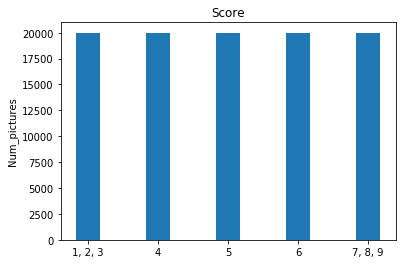

In [119]:
N = 5
ind = np.arange(N)
width = 0.35  

p = plt.bar(ind, plot, width)

plt.ylabel('Num_pictures')
plt.title('Score')
plt.xticks(ind, ('1, 2, 3', '4', '5', '6', '7, 8, 9'))

plt.show()

In [110]:
for i in range(5): 
    dic = var.get('dic_' + str(i+1))
    keylist = [*dic]
    temp = {}
    for j in keylist:
        temp.update({(j + groupsize * i) : dic[j]})
    dic = {}
    dic.update(temp)
    print(dic)

diction_15k = dict(list(dic_1.items()) + list(dic_2.items()) + list(dic_3.items()) + list(dic_4.items()) + list(dic_5.items()))
print(len(diction_15k))

{0: [771257, 0], 1: [771425, 0], 2: [930790, 0], 3: [930799, 0], 4: [930258, 0], 5: [930373, 0], 6: [149446, 0], 7: [149547, 0], 8: [149545, 0], 9: [147836, 0], 10: [147906, 0], 11: [148542, 0], 12: [147996, 0], 13: [775717, 0], 14: [774992, 0], 15: [689802, 0], 16: [689755, 0], 17: [689713, 0], 18: [689698, 0], 19: [308886, 0], 20: [308647, 0], 21: [308709, 0], 22: [348170, 0], 23: [350916, 0], 24: [349745, 0], 25: [347813, 0], 26: [349978, 0], 27: [349019, 0], 28: [349646, 0], 29: [268694, 0], 30: [268856, 0], 31: [266380, 0], 32: [267236, 0], 33: [267683, 0], 34: [268416, 0], 35: [268728, 0], 36: [268057, 0], 37: [267071, 0], 38: [268860, 0], 39: [917802, 0], 40: [917722, 0], 41: [7088, 0], 42: [7046, 0], 43: [7003, 0], 44: [7089, 0], 45: [7130, 0], 46: [7026, 0], 47: [6975, 0], 48: [7029, 0], 49: [7126, 0], 50: [7035, 0], 51: [7022, 0], 52: [7041, 0], 53: [292972, 0], 54: [295735, 0], 55: [294460, 0], 56: [293406, 0], 57: [294662, 0], 58: [293094, 0], 59: [295850, 0], 60: [293644, 

20001


In [66]:
pickle.dump(diction_15k, open(pickle_dir, 'wb'))

20001


In [117]:
diction = {1:1,2:2,3:3,4:4,5:5,6:6,7:7,8:8,9:9,0:0}

keylist = [*diction]

temp = {}

for i in keylist:
    temp.update({i * 2 : diction[i]})

diction = temp
    
print(diction)

{2: 1, 4: 2, 6: 3, 8: 4, 10: 5, 12: 6, 14: 7, 16: 8, 18: 9, 0: 0}


In [1]:
# Driver code 
dict1 = {'a': 10, 'b': 8} 
dict2 = {'d': 6, 'c': 4} 

dict1.update(dict2)
# This return None 
print(dict1)
  
# changes made in dict2 
print(dict2) 

{'a': 10, 'b': 8, 'd': 6, 'c': 4}
{'d': 6, 'c': 4}
